In [1]:
#import libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load data
df = pd.read_csv(r'C:\Users\admin\fraud-detection-week5\data\raw\Fraud_Data.csv')
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n" + "="*50 + "\n")

# Initial info
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

print("Statistical Summary:")
print(df.describe())

Shape: (151112, 11)
Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']


Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


Statistical Summary:
             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       

In [4]:
print(df.columns.tolist())

['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']


In [6]:
# 1. Convert datetime columns
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
print("✓ Datetime conversion complete")

# 2. Handle missing values - STRATEGIC DECISION
missing_summary = df.isnull().sum()
print(f"Missing values before:\n{missing_summary}")

# If <5% missing in categorical, fill with mode; if numerical, median
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Filled {col} with mode: {df[col].mode()[0]}")
        else:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled {col} with median: {df[col].median()}")

print("✓ Missing values handled")

# 3. Remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
final_rows = len(df)
print(f"Removed {initial_rows - final_rows} duplicate rows ({((initial_rows-final_rows)/initial_rows)*100:.2f}%)")
print("✓ Duplicates removed")

# 4. Fix data types
df['user_id'] = df['user_id'].astype(str)
df['device_id'] = df['device_id'].astype(str)
df['ip_address'] = df['ip_address'].astype(str)
print("✓ Data types corrected")

✓ Datetime conversion complete
Missing values before:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
✓ Missing values handled
Removed 0 duplicate rows (0.00%)
✓ Duplicates removed
✓ Data types corrected


Class distribution:
class
0    136961
1     14151
Name: count, dtype: int64
Fraud rate: 9.36%


C:\Users\admin\AppData\Local\Temp\ipykernel_22776\1555303308.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[6].boxplot([nonfraud_vals, fraud_vals], labels=['Non-Fraud', 'Fraud'])
C:\Users\admin\AppData\Local\Temp\ipykernel_22776\1555303308.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[7].boxplot([nonfraud_age, fraud_age], labels=['Non-Fraud', 'Fraud'])


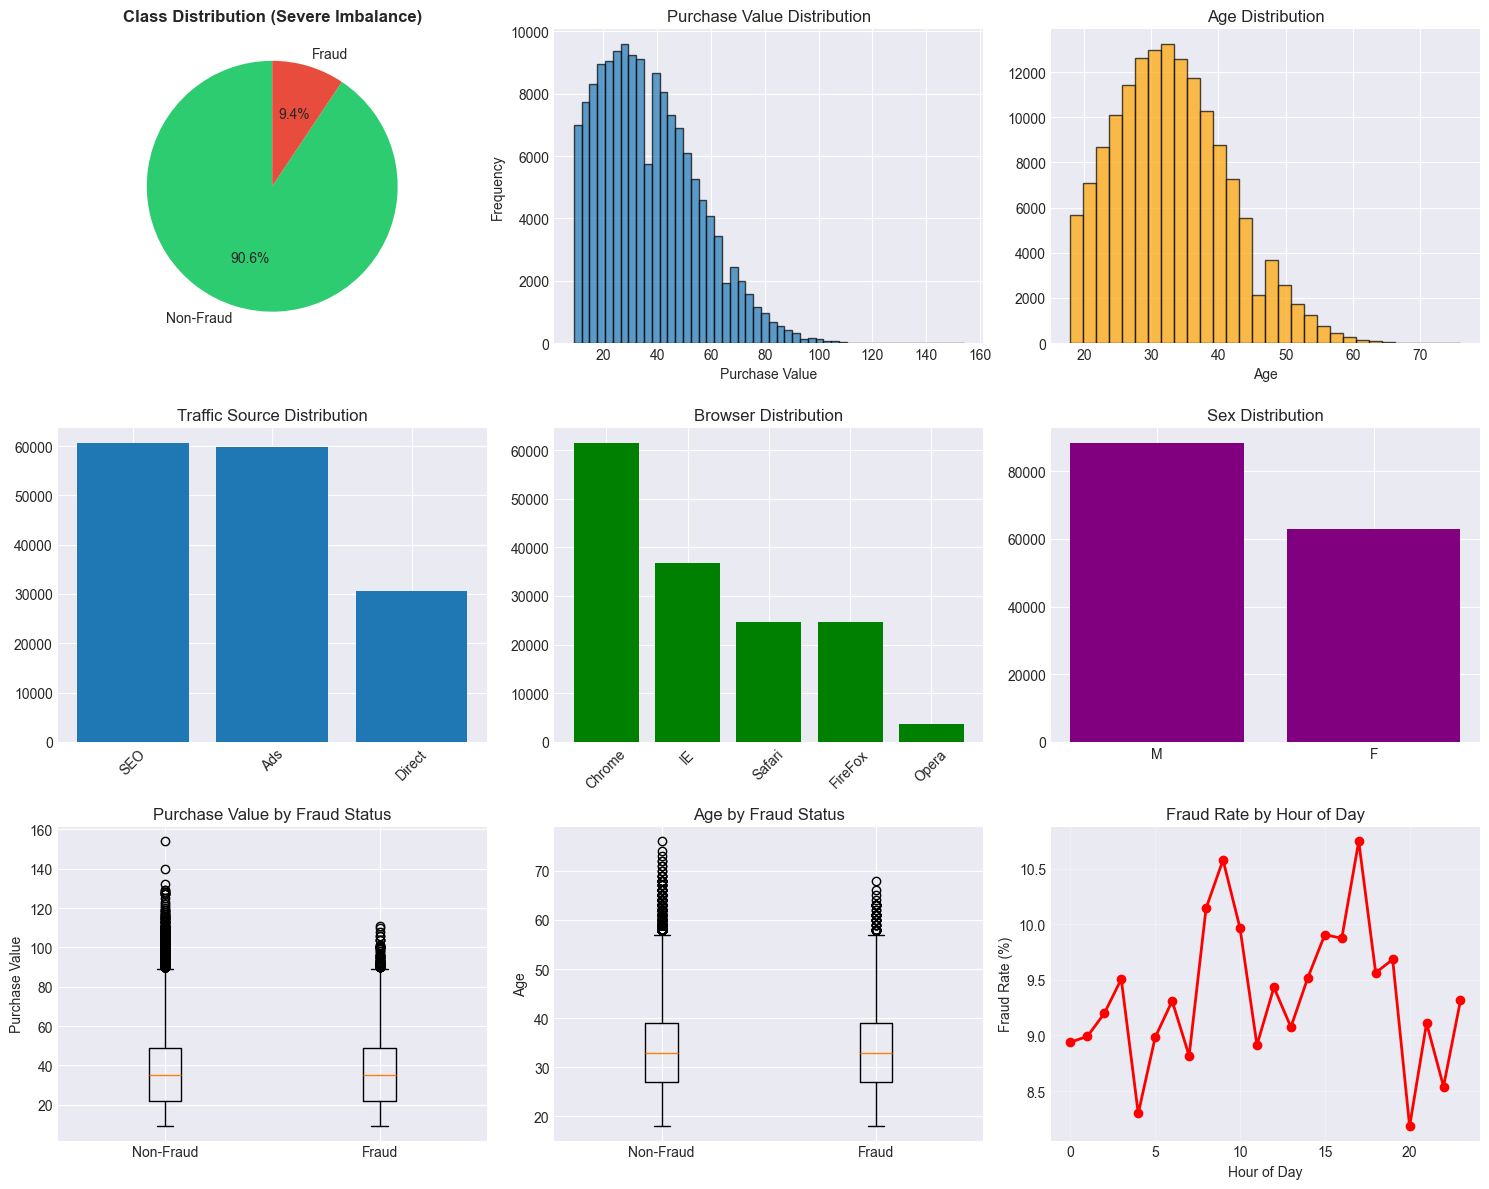

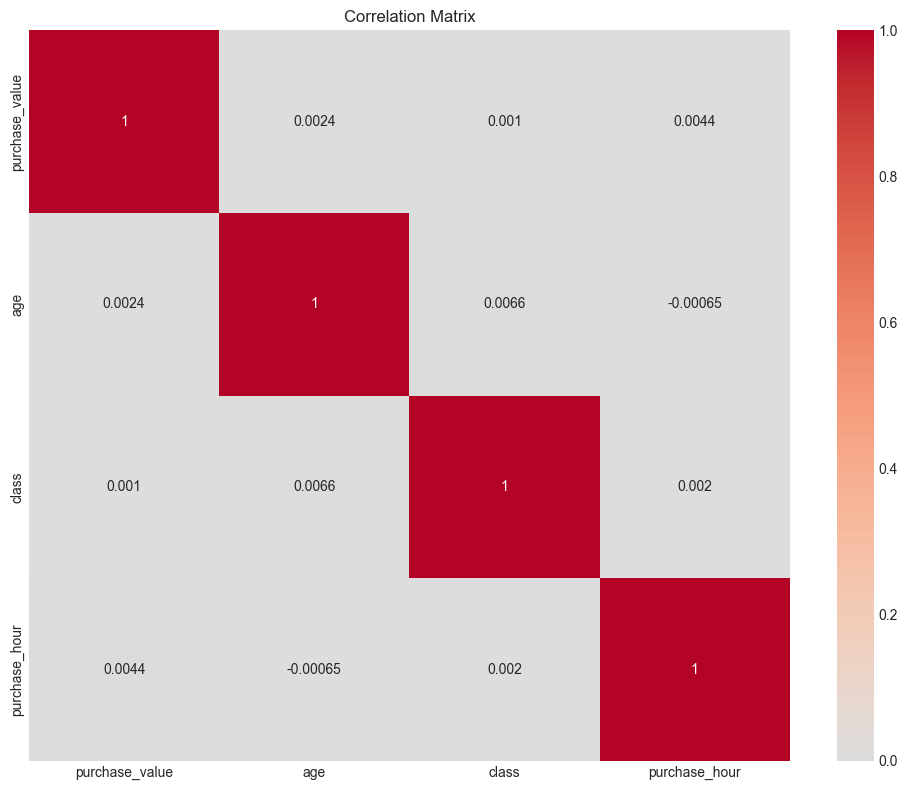

In [8]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# 1. Class Distribution (CRITICAL)
class_counts = df['class'].value_counts()
axes[0].pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0].set_title('Class Distribution (Severe Imbalance)', fontweight='bold')
print(f"Class distribution:\n{class_counts}")
print(f"Fraud rate: {(class_counts[1]/len(df))*100:.2f}%")

# 2. Purchase Value Distribution
axes[1].hist(df['purchase_value'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Purchase Value Distribution')
axes[1].set_xlabel('Purchase Value')
axes[1].set_ylabel('Frequency')

# 3. Age Distribution
axes[2].hist(df['age'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[2].set_title('Age Distribution')
axes[2].set_xlabel('Age')

# 4. Source Distribution
source_counts = df['source'].value_counts()
axes[3].bar(source_counts.index, source_counts.values)
axes[3].set_title('Traffic Source Distribution')
axes[3].tick_params(axis='x', rotation=45)

# 5. Browser Distribution
browser_counts = df['browser'].value_counts()
axes[4].bar(browser_counts.index, browser_counts.values, color='green')
axes[4].set_title('Browser Distribution')
axes[4].tick_params(axis='x', rotation=45)

# 6. Sex Distribution
sex_counts = df['sex'].value_counts()
axes[5].bar(sex_counts.index, sex_counts.values, color='purple')
axes[5].set_title('Sex Distribution')

# 7. Purchase Value by Class (Bivariate)
fraud_vals = df[df['class'] == 1]['purchase_value']
nonfraud_vals = df[df['class'] == 0]['purchase_value']
axes[6].boxplot([nonfraud_vals, fraud_vals], labels=['Non-Fraud', 'Fraud'])
axes[6].set_title('Purchase Value by Fraud Status')
axes[6].set_ylabel('Purchase Value')

# 8. Age by Class (Bivariate)
fraud_age = df[df['class'] == 1]['age']
nonfraud_age = df[df['class'] == 0]['age']
axes[7].boxplot([nonfraud_age, fraud_age], labels=['Non-Fraud', 'Fraud'])
axes[7].set_title('Age by Fraud Status')
axes[7].set_ylabel('Age')

# 9. Hour of Day Analysis (Time-based EDA)
df['purchase_hour'] = df['purchase_time'].dt.hour
hourly_fraud_rate = df.groupby('purchase_hour')['class'].mean() * 100
axes[8].plot(hourly_fraud_rate.index, hourly_fraud_rate.values, 
            marker='o', linewidth=2, color='red')
axes[8].set_title('Fraud Rate by Hour of Day')
axes[8].set_xlabel('Hour of Day')
axes[8].set_ylabel('Fraud Rate (%)')
axes[8].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(r'C:/Users/admin/fraud-detection-week5/reports/eda_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Correlation Heatmap (if numerical features exist)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig(r'C:/Users/admin/fraud-detection-week5/reports/correlation_matrix.png', dpi=300)
    plt.show()